In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

In [ ]:
file_path = '/content/Bengaluru_House_Data.csv'
data = pd.read_csv(file_path)

In [ ]:
# Data Cleaning
# Select relevant columns
df = data[['total_sqft', 'bath', 'balcony', 'size', 'price']]
df = df.dropna(subset=['total_sqft', 'bath', 'price'])  # Drop rows with critical missing values


In [ ]:
# Convert 'size' to number of bedrooms
df['size'] = df['size'].str.extract('(\d+)').astype(float)


In [ ]:
# Handle 'total_sqft' as numeric by converting ranges or text to a single value
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            parts = x.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])  # Drop rows where sqft couldn't be converted


In [ ]:
# Fill missing values for balconies with median
df['balcony'] = df['balcony'].fillna(df['balcony'].median())


In [ ]:
# Outlier Detection: Interquartile Range (IQR) Method
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Detect outliers in numerical columns
outliers = {
    'total_sqft': detect_outliers(df['total_sqft']),
    'bath': detect_outliers(df['bath']),
    'price': detect_outliers(df['price'])
}

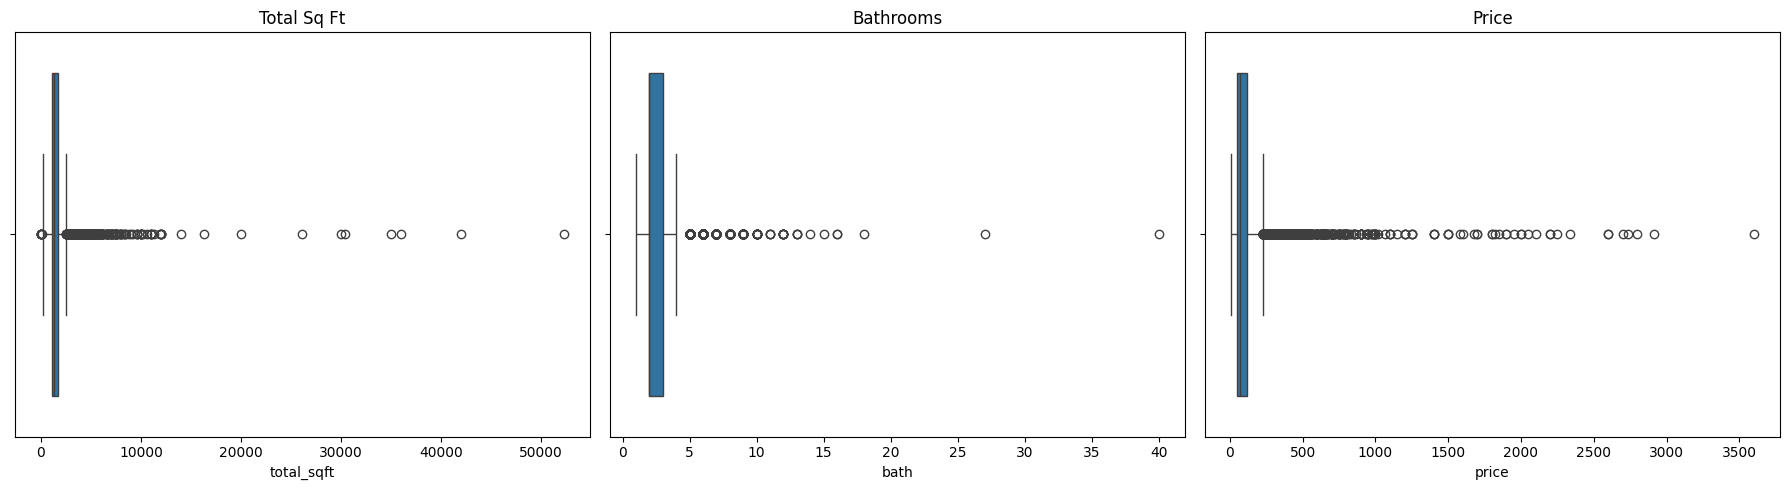

{'total_sqft': 1149, 'bath': 1030, 'price': 1250}

In [ ]:
# Visualize Outliers with Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x=df['total_sqft'], ax=axes[0])
axes[0].set_title('Total Sq Ft')
sns.boxplot(x=df['bath'], ax=axes[1])
axes[1].set_title('Bathrooms')
sns.boxplot(x=df['price'], ax=axes[2])
axes[2].set_title('Price')
plt.tight_layout()
plt.show()

# Count of Outliers
outlier_counts = {key: value.sum() for key, value in outliers.items()}
outlier_counts

In [ ]:
# Rename columns for better readability
df.rename(columns={'total_sqft': 'Area (sq ft)', 'bath': 'Bathrooms', 'balcony': 'Balconies', 'size': 'Bedrooms'}, inplace=True)


In [ ]:
# Define features (X) and target variable (y)
X = df[['Area (sq ft)', 'Bathrooms', 'Balconies', 'Bedrooms']]
y = df['price']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Evaluate the model
y_pred = ridge_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


Model Evaluation:
MAE: 47.00863189778921, MSE: 11593.126575738039, RMSE: 107.67138234339725, R^2: 0.4383444323582092


In [ ]:
# Create Interactive Prediction Input
# Widgets for user input
area_input = widgets.FloatText(description='Area (sq ft):', value=1000)
bathrooms_input = widgets.FloatText(description='Bathrooms:', value=2)
balconies_input = widgets.FloatText(description='Balconies:', value=1)
bedrooms_input = widgets.FloatText(description='Bedrooms:', value=2)
predict_button = widgets.Button(description='Predict Price')
output = widgets.Output()

In [ ]:
# Function to predict based on user input
def predict_price(change):
    # Retrieve inputs
    area = area_input.value
    bathrooms = bathrooms_input.value
    balconies = balconies_input.value
    bedrooms = bedrooms_input.value

    # Prepare input for prediction
    user_input = np.array([[area, bathrooms, balconies, bedrooms]])
    predicted_price = ridge_model.predict(user_input)[0]

    # Display prediction
    with output:
        output.clear_output()
        print(f"Predicted Price: {predicted_price:.2f} Lakhs")


In [ ]:

# Link button to prediction function
predict_button.on_click(predict_price)

# Display widgets and output
display(area_input, bathrooms_input, balconies_input, bedrooms_input, predict_button, output)

FloatText(value=1000.0, description='Area (sq ft):')

FloatText(value=2.0, description='Bathrooms:')

FloatText(value=1.0, description='Balconies:')

FloatText(value=2.0, description='Bedrooms:')

Button(description='Predict Price', style=ButtonStyle())

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
